In [2]:
import os, json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file_list = os.listdir("../clams/ambreducer_results/")

file_list

filtered_list = []
for file in file_list:
  if file.endswith("_init.json"):
    filtered_list.append(file[:-10])
  elif file.endswith("_final.json"):
    filtered_list.append(file[:-11])
  elif file.endswith("_results.json"):
    filtered_list.append(file[:-13])

filtered_list = list(set(filtered_list))

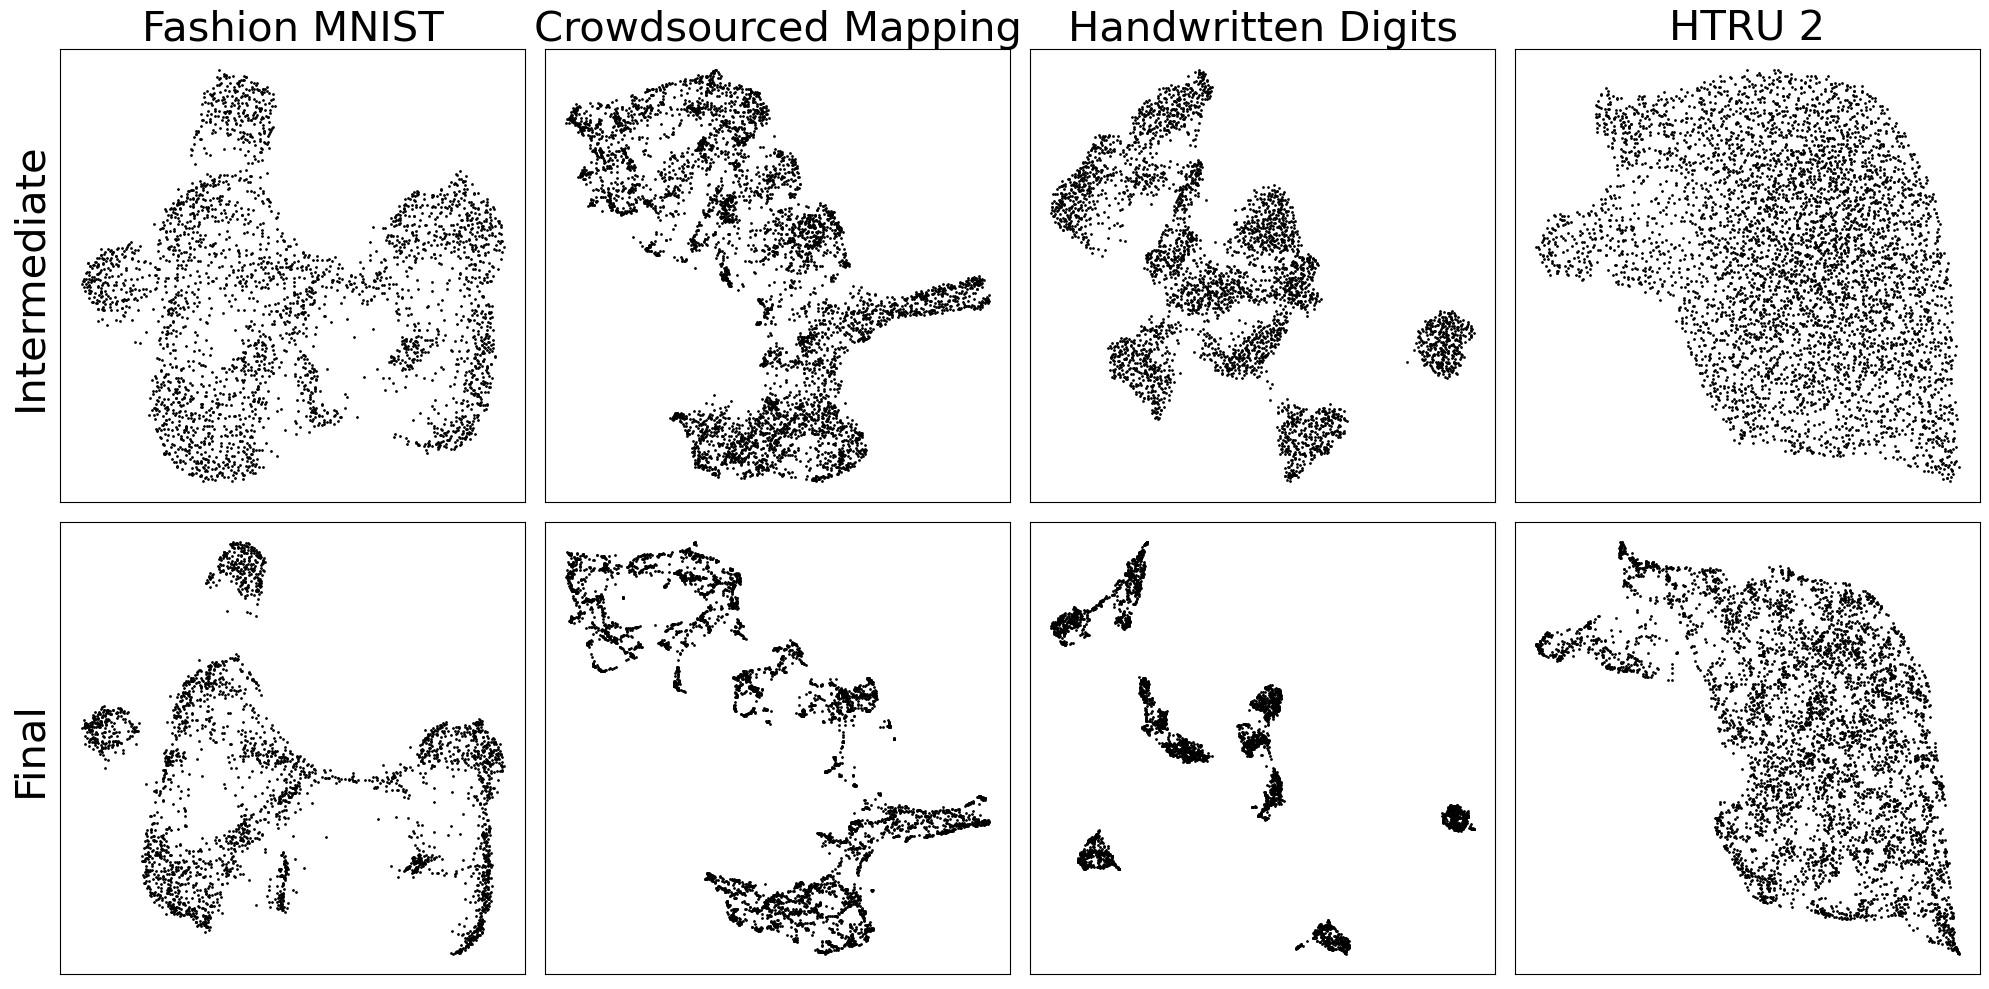

In [23]:
datasets = [
    "statlog_image_segmentation", "dry_bean", "optical_recognition_of_handwritten_digits", "crowdsourced_mapping", 
    "fashion_mnist", "durum_wheat_features", "cardiovascular_study", "durum_wheat_features", "rice_seed_gonen_jasmine",  "htru2"
]

datasets = [
	"fashion_mnist",
	"crowdsourced_mapping",
	"optical_recognition_of_handwritten_digits",
	"htru2"
]

dataset_name = [
	"Fashion MNIST",
	"Crowdsourced Mapping",
	"Handwritten Digits",
	"HTRU 2"
]

fig, ax = plt.subplots(2, 4,  figsize=(20, 10))


for i, dataset in enumerate(datasets):
	dataset_init = json.load(open("../clams/ambreducer_results/" + dataset + "_init.json"))
	dataset_final = json.load(open("../clams/ambreducer_results/" + dataset + "_final.json"))

	dataset_init = np.array(dataset_init)
	dataset_final = np.array(dataset_final)

	ax[0, i].set_title(dataset_name[i], fontsize=30)
	ax[0, i].scatter(dataset_init[:, 0], dataset_init[:, 1], s=1, c="black")
	ax[1, i].scatter(dataset_final[:, 0], dataset_final[:, 1], s=1, c="black")

	ax[0, i].set_xticks([])
	ax[0, i].set_yticks([])
	ax[1, i].set_xticks([])
	ax[1, i].set_yticks([])

	if i == 0:
		ax[0, i].set_ylabel("Intermediate", fontsize=30)
		ax[1, i].set_ylabel("Final", fontsize=30)

plt.tight_layout()

plt.savefig("./plot/ambreducer_result.pdf", dpi=300)
plt.savefig("./plot/ambreducer_result.png", dpi=300)

In [4]:
datasets = [dataset + ".npy" for dataset in datasets]


final_datasets = []
for dataset in datasets:
	final_datasets.append(dataset[:-4] + "_final.npy")
	final_datasets.append(dataset[:-4] + "_init.npy")


with open("./ambreducer_list/ambreducer_list.json", "w") as f:
	json.dump(final_datasets, f)
